<a href="https://colab.research.google.com/github/diviramon/NBA-Rookie-Analytics/blob/main/LDA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
 This notebook was used to:
 1) Given clustering results k-mean, and complete ward linkage, merge with rookie season and second season data
 2) Calculate LDA features and visualize correlation matrices for the 4 cases
     a) rookie season complete ward linkage
     b) first two seasons complete ward linkage
     c) rookie season k-means
     d) first two seasons k-means
 3) Train the 4 classification models using 10-fold cross validation to produce the results for the report
'''

In [ ]:
# calculates rookie season data given the results from clustering
def calculate_first_season_data(results_file, output_file):
    results = pd.read_csv(results_file)
    seasons = pd.read_csv('seasons.csv')
    seasons = seasons.dropna()
    seasons = seasons.rename(columns={'Player': 'PLAYER'})
    rookie_seasons = seasons.groupby('PLAYER').apply(first_season).reset_index(drop=True)
    results = pd.merge(results, rookie_seasons, on='PLAYER')
    results.to_csv(output_file)

# calculates first and second season data given the results from clusting
def calculate_first_and_second_season_data(results_file, output_file):
    results = pd.read_csv(results_file)
    seasons = pd.read_csv('seasons.csv')
    seasons = seasons.dropna()
    seasons = seasons.rename(columns={'Player': 'PLAYER'})
    seasons = seasons.groupby('PLAYER').apply(two_seasons).reset_index(drop=True)
    results = pd.merge(results, seasons, on='PLAYER')
    results.to_csv(output_file)

# takes first entry in the group as data is ordered ascending by year
def first_season(seasons):
    return seasons.iloc[0]

# takes first two entries and produces the mean
def two_seasons(seasons):
    if len(seasons) >= 2:
        df = seasons.iloc[:2]
        df = df.mean()
        data = {
        'PPG': df['PPG'],      
        'APG': df['APG'],
        'SPG': df['SPG'],
        'BPG': df['BPG'],
        'FTPG': df['FTPG'],
        'FTAPG': df['FTAPG'],
        '3PPG': df['3PPG'],
        '3PAPG': df['3PAPG'],
        'MPG': df['MPG'],
        '2PPG': df['2PPG'],
        '2PAPG': df['2PAPG'],
        'FGPG': df['FGPG'],
        'FGAPG': df['FGAPG'],
        'PFPG': df['PFPG'],
        'ORBPG': df['ORBPG'],
        'DRBPG': df['DRBPG'],
        'TRBPG': df['TRBPG'],
        'TOVPG': df['TOVPG'],
        'PER': df['PER'],
        'TS%': df['TS%'],
        '3PAr': df['3PAr'],
        'FTr': df['FTr'],
        'ORB%': df['ORB%'],
        'DRB%': df['DRB%'],
        'TRB%': df['TRB%'],
        'AST%': df['AST%'],
        'STL%': df['STL%'],
        'BLK%': df['BLK%'],
        'TOV%': df['TOV%'],
        'USG%': df['USG%'],
        'OWS': df['OWS'],
        'DWS': df['DWS'],
        'WS': df['WS'],
        'WS/48': df['WS/48'],
        'OBPM': df['OBPM'],
        'DBPM': df['DBPM'],
        'BPM': df['BPM'],
        'VORP': df['VORP'],
        'FG%': df['FG%'],
        '3P%': df['3P%'],
        '2P%': df['2P%'],
        'eFG%': df['eFG%'],
        'FT%': df['FT%'],
        'PLAYER': seasons.iloc[0].PLAYER,
        }
        return pd.Series(data)
    data = {
    'PPG': None,      
    'APG': None,
    'SPG': None,
    'BPG': None,
    'FTPG': None,
    'FTAPG': None,
    '3PPG': None,
    '3PAPG': None,
    'MPG': None,
    '2PPG': None,
    '2PAPG': None,
    'FGPG': None,
    'FGAPG': None,
    'PFPG': None,
    'ORBPG': None,
    'DRBPG': None,
    'TRBPG': None,
    'TOVPG': None,
    'PER': None,
    'TS%': None,
    '3PAr': None,
    'FTr': None,
    'ORB%': None,
    'DRB%': None,
    'TRB%': None,
    'AST%': None,
    'STL%': None,
    'BLK%': None,
    'TOV%': None,
    'USG%': None,
    'OWS': None,
    'DWS': None,
    'WS': None,
    'WS/48': None,
    'OBPM': None,
    'DBPM': None,
    'BPM': None,
    'VORP': None,
    'FG%': None,
    '3P%': None,
    '2P%': None,
    'eFG%': None,
    'FT%': None,
    'PLAYER': seasons.iloc[0].PLAYER,
    }
    return pd.Series(data)

In [ ]:
# library used for data manipulation
import pandas as pd

In [ ]:
# csv file names for storage - notebook will create these files
first_season_complete = 'first_season_complete.csv'
two_season_complete = 'two_season_complete.csv'
first_season_k_cluster = 'first_season_k_cluster.csv'
two_season_k_cluster = 'two_season_k_cluster.csv'

# creates first season and second season datasets from complete ward linkage from results-complete.csv produced by ________
calculate_first_season_data('results-complete.csv', first_season_complete)
calculate_first_and_second_season_data('results-complete.csv', two_season_complete)

# creates first season and second season datasets from k-means from results-k-cluster.csv produced by __________
calculate_first_season_data('results-k-cluster.csv', first_season_k_cluster)
calculate_first_and_second_season_data('results-k-cluster.csv', two_season_k_cluster)

In [ ]:
# cleaning method for rookie season data - drops unnecessary columns
def clean_first_season(file):
    seasons = pd.read_csv(file)
    return seasons.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'PLAYER', 'Year', 'Pos', 'Tm'])

In [ ]:
# cleaning method for first and second season data - drops unnecessary columns
def clean_two_season(file):
    seasons = pd.read_csv(file)
    return seasons.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'PLAYER'])

In [ ]:
# use cleaning method on complete ward linkage data
fs_complete_data = clean_first_season(first_season_complete)
ts_complete_data = clean_two_season(two_season_complete)

# use cleaning method on k-means data
fs_cluster_data = clean_first_season(first_season_k_cluster)
ts_cluster_data = clean_two_season(two_season_k_cluster)

In [ ]:
# LDA tool used for feature calculation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# preproccessing tool for normalizing input data
from sklearn.preprocessing import StandardScaler

# custom method for splitting the merged data set into X - inputs, y - outputs
# returns X, y
def split_x_y(data):
    return data.drop(columns=['CLUSTER']).to_numpy(), data['CLUSTER'].to_numpy()

# custom method, given a pandas dataframe, calculate the LDA features, returns X (LDA) and y
def get_lda_features(data):
    X, y = split_x_y(data)
    sc = StandardScaler()
    X = sc.fit_transform(X)
    lda = LDA()
    return lda.fit_transform(X, y), y

# merges y and X to produce a data frame which can be used to produce a correlation matrix
def get_merged_io(lda, data):
    classes = pd.DataFrame(split_x_y(data)[1])
    features = pd.DataFrame(lda)
    result = pd.merge(classes, features, left_index=True, right_index=True)
    return result.rename(columns={'0_x':'CLASS', '0_y': '0'})
    

In [ ]:
# calculating lda features and outputs as a dataframe to be used to produce
# the corresponding correlation matrix for each case
fs_complete_data_lda = get_merged_io(get_lda_features(fs_complete_data)[0], fs_complete_data)
ts_complete_data_lda = get_merged_io(get_lda_features(ts_complete_data[0]), ts_complete_data)
fs_cluster_data_lda = get_merged_io(get_lda_features(fs_cluster_data)[0], fs_cluster_data)
ts_cluster_data_lda = get_merged_io(get_lda_features(ts_cluster_data)[0], ts_cluster_data)

In [ ]:
# library for producing plots and graphs
import matplotlib.pyplot as plt
# opensource library https://pypi.org/project/heatmapz for correlation matrices
# have to pip install package to use
from heatmap import heatmap, corrplot

# custom method for plotting and saving correlation matrices
def plot_and_save_corr_matrix(data, file_name, matrix_name):
    fig = plt.figure(figsize=(19, 15))
    corrplot(data.corr(), size_scale=300)
    plt.title(matrix_name, fontsize=16)
    fig.savefig(file_name)

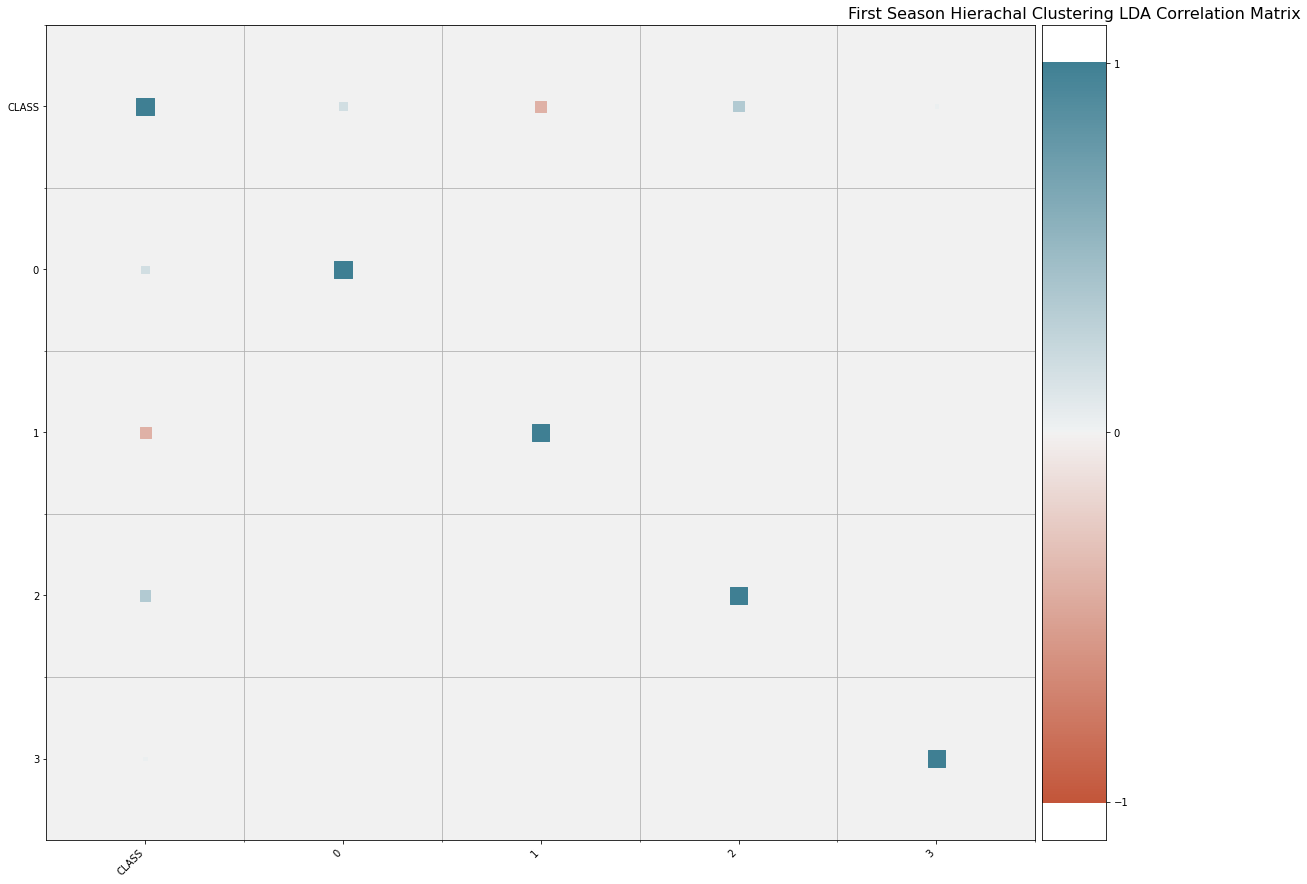

In [ ]:
# case a
plot_and_save_corr_matrix(fs_complete_data_lda, 'fs_complete_data_lda.png', 'First Season Hierachal Clustering LDA Correlation Matrix')

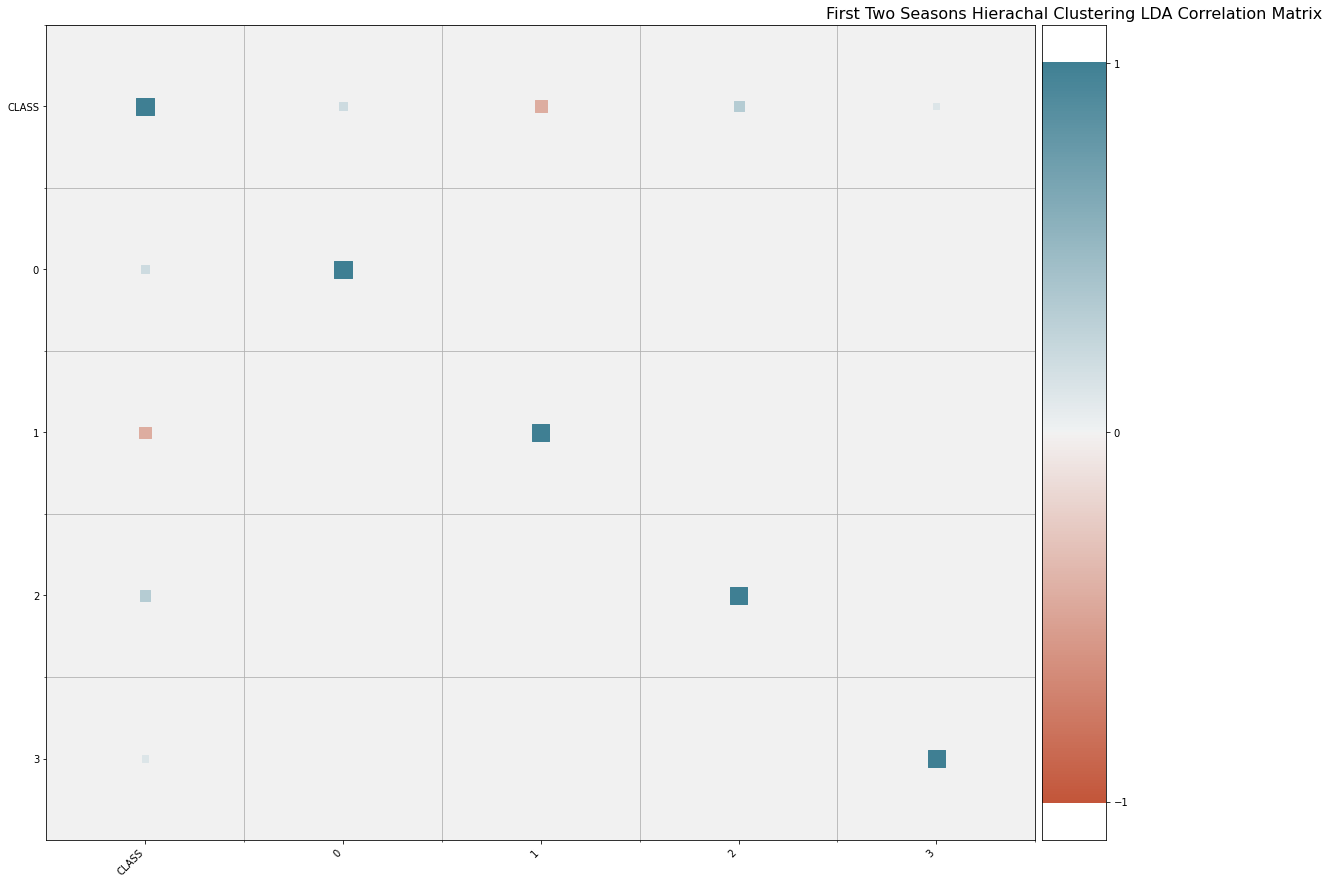

In [ ]:
# case b
plot_and_save_corr_matrix(ts_complete_data_lda, 'ts_complete_data_lda.png', 'First Two Seasons Hierachal Clustering LDA Correlation Matrix')

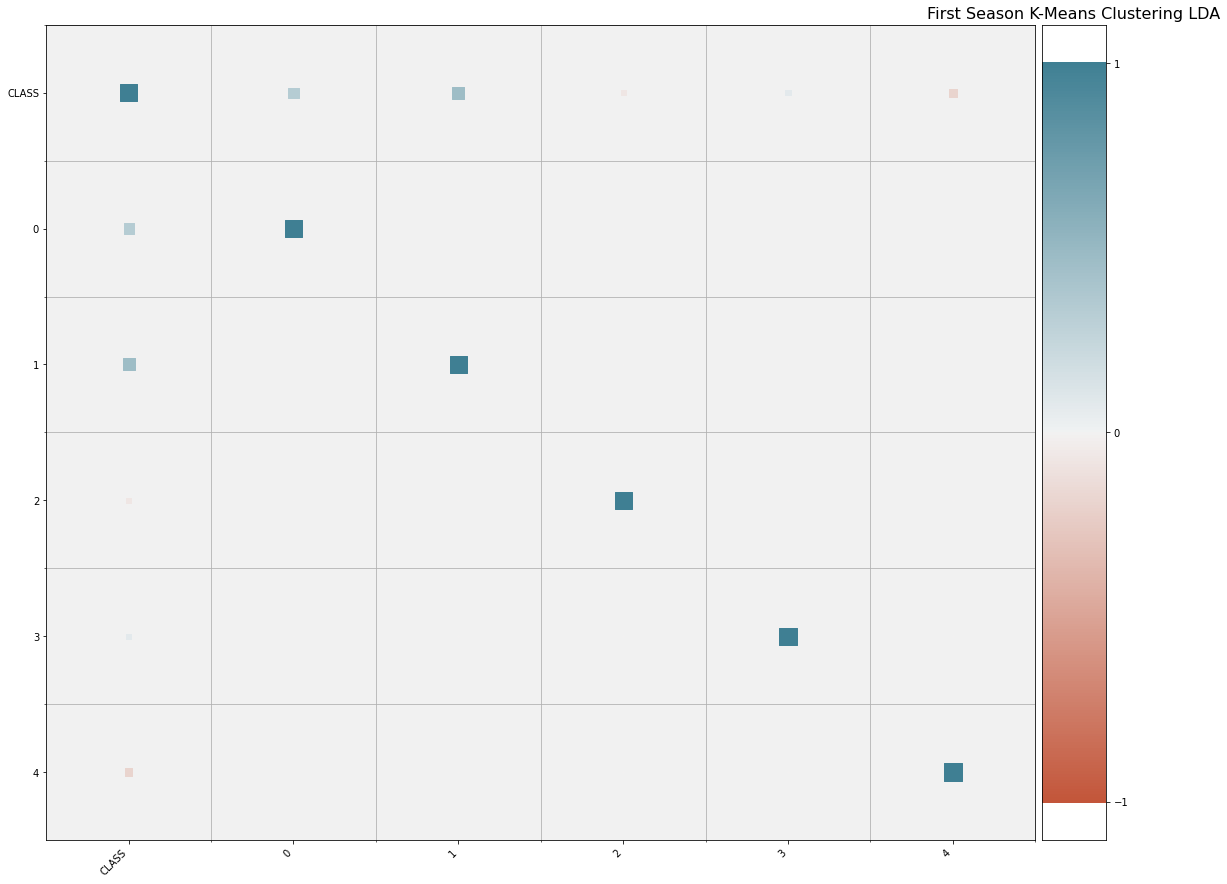

In [ ]:
# case c
plot_and_save_corr_matrix(fs_cluster_data_lda, 'fs_cluster_data_lda.png', 'First Season K-Means Clustering LDA')

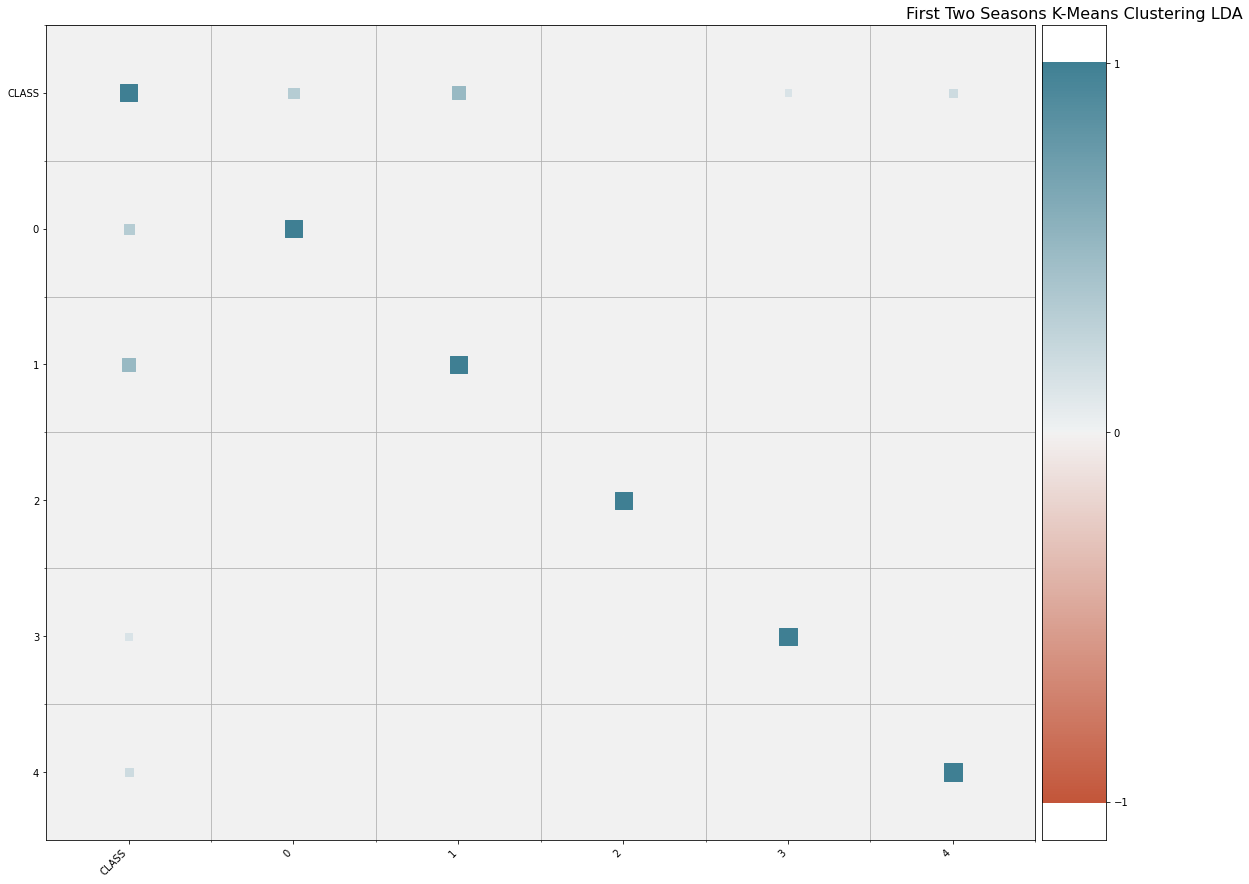

In [ ]:
# case d
plot_and_save_corr_matrix(ts_cluster_data_lda, 'ts_cluster_data_lda.png', 'First Two Seasons K-Means Clustering LDA')

In [ ]:
# import model from sklearn - opensource machinelearning library
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# class used for 10-fold cross validation
from sklearn.model_selection import KFold

# initialize and store classifier models in a dictionary to loop through and print results
classifiers = {
    'mlp': MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(100,1000,100), verbose=False, learning_rate_init=0.001, tol=0.0000001),
    'nb': GaussianNB(),
    'random-forest': RandomForestClassifier(),
    'gradient-boost': GradientBoostingClassifier(),
}

# custom training method which uses 10-fold cross validation to train 
# a classifier given X, and y. This method returns the maximum and average accuracy of
# the classifier
def train_classifier(classifier, X, y):
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        scores.append(score)
    return max(scores), sum(scores)/len(scores)

In [ ]:
# Get the lda features for the rookie season k-means data
X, y = get_lda_features(fs_cluster_data)
# Loop through the dictionary of desired classifiers, train each one, and print the results
for classifier in classifiers.keys():
    results = train_classifier(classifiers[classifier], X,y)
    print('{0}: {1}'.format(classifier, results))

mlp: (0.6956521739130435, 0.6340579710144929)
nb: (0.7391304347826086, 0.6558454106280194)
random-forest: (0.7391304347826086, 0.6253623188405797)
gradient-boost: (0.6521739130434783, 0.5795169082125604)


In [ ]:
# Get the lda features for the first two seasons k-means data
X, y = get_lda_features(ts_cluster_data)
# Loop through the dictionary of desired classifiers, train each one, and print the results
for classifier in classifiers.keys():
    results = train_classifier(classifiers[classifier], X, y)
    print('{0}: {1}'.format(classifier, results))

mlp: (0.782608695652174, 0.6579227053140098)
nb: (0.8043478260869565, 0.6971980676328503)
random-forest: (0.782608695652174, 0.6753623188405797)
gradient-boost: (0.7608695652173914, 0.6297101449275363)


In [ ]:
# Get the lda features for the rookie season complete ward linkage data
X, y = get_lda_features(fs_complete_data)
# Loop through the dictionary of desired classifiers, train each one, and print the results
for classifier in classifiers.keys():
    results = train_classifier(classifiers[classifier], X, y)
    print('{0}: {1}'.format(classifier, results))

mlp: (0.8913043478260869, 0.8497584541062804)
nb: (0.9130434782608695, 0.8540579710144927)
random-forest: (0.9347826086956522, 0.8476328502415459)
gradient-boost: (0.9347826086956522, 0.838937198067633)


In [ ]:
# Get the lda features for the first two seasons complete ward linkage data
X, y = get_lda_features(ts_complete_data)
# Loop through the dictionary of desired classifiers, train each one, and print the results
for classifier in classifiers.keys():
    results = train_classifier(classifiers[classifier], X, y)
    print('{0}: {1}'.format(classifier, results))

mlp: (0.9565217391304348, 0.8693719806763285)
nb: (0.9130434782608695, 0.8584057971014494)
random-forest: (0.9130434782608695, 0.8628019323671499)
gradient-boost: (0.8913043478260869, 0.8410628019323673)
